# Baseline Incentives Simulation - EDA

In [18]:
import sys
sys.path.append('../')

In [19]:
import pandas as pd
import os


file = sorted(os.listdir('../data/simulations'))[-1]
data_path = f"../data/simulations/{file}"
raw_df = pd.read_pickle(data_path, compression='gzip')

dfs = [raw_df,
       raw_df.reward.map(lambda x: x.__dict__).apply(pd.Series),
       raw_df.network_power_scenario.map(lambda x: x.__dict__).apply(pd.Series)]

DROP_COLS = ['reward', 'network_power_scenario']

df = (pd.concat(dfs,
                axis=1)
      .drop(columns=DROP_COLS)
      #.dropna()
      .set_index('days_passed')
      .assign(block_reward=lambda x: x.simple_reward + x.baseline_reward)
      .assign(marginal_reward=lambda x: x.block_reward / x.network_power)
      )


<AxesSubplot:xlabel='days_passed'>

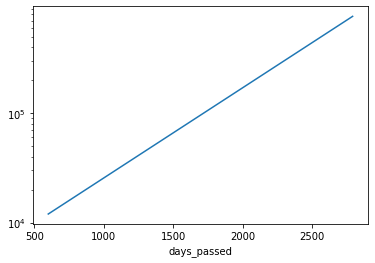

In [20]:
df.network_power.plot(logy=True)

<AxesSubplot:xlabel='days_passed'>

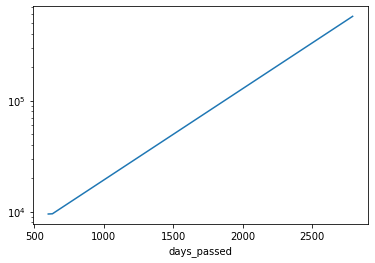

In [21]:
df.baseline.plot(logy=True)

<AxesSubplot:xlabel='days_passed'>

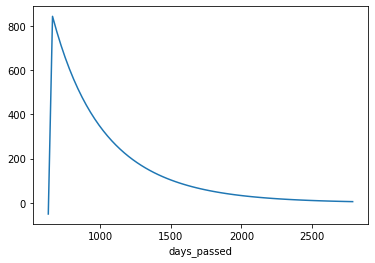

In [22]:
df.marginal_reward.plot()

In [23]:
df

,delta_days,network_power,baseline,cumm_capped_power,effective_network_time,simulation,subset,run,timestep,timestep_in_days,...,cross_down_after_beginning,stable_after_cross_down,take_off_after_stable,steady_after_take_off,growth_cross_down,growth_stable,growth_take_off,growth_steady,block_reward,marginal_reward
days_passed,,,,,,,,,,,,,,,,,,,,,
600.0,NaN,12000.000000,9500.000000,6000.000000,1.400000,0,0,1,0,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,NaN,NaN
630.0,30.0,12703.005975,9546.134995,6784.076796,1.394098,0,0,1,1,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,-6.381954e+05,-50.239714
660.0,30.0,13447.196733,10105.384156,7614.087815,1.499503,0,0,1,2,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,1.133290e+07,842.770120
690.0,30.0,14234.985038,10697.396277,8492.724060,1.603280,0,0,1,3,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,1.102393e+07,774.425176
720.0,30.0,15068.924999,11324.090735,9422.834182,1.705566,0,0,1,4,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,1.073691e+07,712.520220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670.0,30.0,609851.269136,458294.875508,672795.623948,7.344094,0,0,1,69,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,4.511528e+06,7.397752
2700.0,30.0,645578.692976,485143.545158,712643.143057,7.426609,0,0,1,70,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,4.467511e+06,6.920166
2730.0,30.0,683399.166186,513565.112741,754825.082502,7.509103,0,0,1,71,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,4.424002e+06,6.473525
